# Distribution of influences

To get a grip on how much randomness influences the results, we run the same model lots of times and compare the results.

In [1]:
# for Colab, install fin_benefits and unemployment-gym from Github
#!pip install -q git+https://github.com/ajtanskanen/benefits.git  
#!pip install -q git+https://github.com/ajtanskanen/econogym.git
#!pip install -q git+https://github.com/ajtanskanen/lifecycle-rl.git

# and then restart kernel
  
  # For a specific version:
#!pip install tensorflow==1.15
#!pip install stable-baselines==2.8
  
# restart kernel after running pip's

Then load all modules and set parameters for simulations.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from lifecycle_rl import Lifecycle

%matplotlib inline
%pylab inline

# varoitukset piiloon (Stable baseline ei ole vielä Tensorflow 2.0-yhteensopiva, ja Tensorflow 1.15 valittaa paljon)
# ei taida toimia piilottaminen
import warnings
warnings.filterwarnings('ignore')

# parameters for the simulation
# episode = 51 / 205 timesteps (1y/3m timestep)
pop_size=10_000 # size of the population to be simulated
size1=5_000_000 #0_000 # number of timesteps in phase 1 training (callback not used)
size2=100 #0_000 # number of timesteps in phase 2 training (callback is used to save the best results)
size3=100 # number of timesteps in phase 1 training (callback not used) for policy changes
batch1=1 # size of minibatch in phase 1 as number of episodes
batch2=9_00  # size of minibatch in phase 1 as number of episodes
callback_minsteps=batch2 # how many episodes callback needs 
deterministic=False # use deterministic prediction (True) or probabilitic prediction (False)
mortality=False # include mortality in computations
randomness=True # include externally given, random state-transitions (parental leaves, disability, lay-offs) 
pinkslip=True # include lay-offs at 5 percent level each year
rlmodel='acktr' # use ACKTR algorithm
twostage=False # ajataan kahdessa vaiheessa vai ei
perusmalli='best/malli_perus3'

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Populating the interactive namespace from numpy and matplotlib


# Baseline

Lasketaan työllisyysasteet nykymallissa.

No mortality included
Parameters of lifecycle:
timestep 0.25
gamma 0.9793703613355593 (0.9200000000000003 per anno)
min_age 20
max_age 70
min_retirementage 63.5
max_retirementage 68.5
ansiopvraha_kesto300 None
ansiopvraha_kesto400 None
ansiopvraha_toe None
perustulo False
karenssi_kesto 0.25
mortality False
randomness True
include_putki None
include_pinkslip True
step 0.25

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125




Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where






training...








---------------------------------
| explained_variance | 0.972    |
| fps                | 1421     |
| nupdates           | 1        |
| policy_entropy     | 0.707    |
| policy_loss        | 0.156    |
| total_timesteps    | 0        |
| value_loss         | 0.325    |
-----------------------------

---------------------------------
| explained_variance | 0.945    |
| fps                | 2264     |
| nupdates           | 20       |
| policy_entropy     | 0.322    |
| policy_loss        | 0.507    |
| total_timesteps    | 46531    |
| value_loss         | 2.47     |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps                | 2188     |
| nupdates           | 30       |
| policy_entropy     | 0.297    |
| policy_loss        | -0.513   |
| total_timesteps    | 71021    |
| value_loss         | 2.91     |
---------------------------------
---------------------------------
| explained_variance | 0.899    |
| fps                | 2155     |
| nupdates           | 40       |
| policy_entropy     | 0.281    |
| policy_loss        | -0.11    |
| total_timesteps    | 95511    |
| value_loss         | 1.12     |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 1778     |
| nupdates           | 290      |
| policy_entropy     | 0.413    |
| policy_loss        | 0.053    |
| total_timesteps    | 707761   |
| value_loss         | 0.475    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1774     |
| nupdates           | 300      |
| policy_entropy     | 0.379    |
| policy_loss        | -0.142   |
| total_timesteps    | 732251   |
| value_loss         | 0.534    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 1770     |
| nupdates           | 310      |
| policy_entropy     | 0.395    |
| policy_loss        | 0.055    |
| total_timesteps    | 756741   |
| value_loss         | 0.4      |
---------------------------------
----------------------------------
| explained_variance | 0.98      |
| fps       

---------------------------------
| explained_variance | 0.985    |
| fps                | 1678     |
| nupdates           | 560      |
| policy_entropy     | 0.665    |
| policy_loss        | 0.0375   |
| total_timesteps    | 1368991  |
| value_loss         | 0.213    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1675     |
| nupdates           | 570      |
| policy_entropy     | 0.76     |
| policy_loss        | 0.0807   |
| total_timesteps    | 1393481  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1674     |
| nupdates           | 580      |
| policy_entropy     | 0.723    |
| policy_loss        | -0.132   |
| total_timesteps    | 1417971  |
| value_loss         | 0.459    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps         

---------------------------------
| explained_variance | 0.982    |
| fps                | 1662     |
| nupdates           | 830      |
| policy_entropy     | 0.762    |
| policy_loss        | 0.0982   |
| total_timesteps    | 2030221  |
| value_loss         | 0.208    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1663     |
| nupdates           | 840      |
| policy_entropy     | 0.79     |
| policy_loss        | -0.0664  |
| total_timesteps    | 2054711  |
| value_loss         | 0.417    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1663     |
| nupdates           | 850      |
| policy_entropy     | 0.768    |
| policy_loss        | -0.0271  |
| total_timesteps    | 2079201  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 1666     |
| nupdates           | 1100     |
| policy_entropy     | 0.752    |
| policy_loss        | 0.128    |
| total_timesteps    | 2691451  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.924    |
| fps                | 1665     |
| nupdates           | 1110     |
| policy_entropy     | 0.737    |
| policy_loss        | -0.0722  |
| total_timesteps    | 2715941  |
| value_loss         | 0.88     |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1665     |
| nupdates           | 1120     |
| policy_entropy     | 0.848    |
| policy_loss        | -0.0224  |
| total_timesteps    | 2740431  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps         

---------------------------------
| explained_variance | 0.985    |
| fps                | 1665     |
| nupdates           | 1370     |
| policy_entropy     | 0.707    |
| policy_loss        | 0.109    |
| total_timesteps    | 3352681  |
| value_loss         | 0.202    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1665     |
| nupdates           | 1380     |
| policy_entropy     | 0.842    |
| policy_loss        | -0.182   |
| total_timesteps    | 3377171  |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1665     |
| nupdates           | 1390     |
| policy_entropy     | 0.722    |
| policy_loss        | 0.00534  |
| total_timesteps    | 3401661  |
| value_loss         | 0.42     |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1669     |
| nupdates           | 1640     |
| policy_entropy     | 0.762    |
| policy_loss        | -0.00652 |
| total_timesteps    | 4013911  |
| value_loss         | 0.479    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1669     |
| nupdates           | 1650     |
| policy_entropy     | 0.752    |
| policy_loss        | -0.0704  |
| total_timesteps    | 4038401  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps                | 1669     |
| nupdates           | 1660     |
| policy_entropy     | 0.753    |
| policy_loss        | -0.0298  |
| total_timesteps    | 4062891  |
| value_loss         | 0.591    |
---------------------------------
----------------------------------
| explained_variance | 0.971     |
| fps       

---------------------------------
| explained_variance | 0.97     |
| fps                | 1675     |
| nupdates           | 1910     |
| policy_entropy     | 0.79     |
| policy_loss        | 0.0203   |
| total_timesteps    | 4675141  |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.908    |
| fps                | 1675     |
| nupdates           | 1920     |
| policy_entropy     | 0.751    |
| policy_loss        | -0.131   |
| total_timesteps    | 4699631  |
| value_loss         | 1.14     |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1675     |
| nupdates           | 1930     |
| policy_entropy     | 0.773    |
| policy_loss        | 0.105    |
| total_timesteps    | 4724121  |
| value_loss         | 0.286    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.952    |
| fps                | 1170     |
| nupdates           | 1        |
| policy_entropy     | 0.847    |
| policy_loss        | -0.0303  |
| total_timesteps    | 0        |
| value_loss         | 0.72     |
---------------------------------
---------------------------------
| explained_variance | 0.871    |
| fps                | 1973     |
| nupdates           | 10       |
| policy_entropy     | 0.238    |
| policy_loss        | 0.248    |
| total_timesteps    | 22041    |
| value_loss         | 1.73     |
---------------------------------
---------------------------------
| explained_variance | -0.0908  |
| fps                | 1746     |
| nupdates           | 20       |
| policy_entropy     | 0.289    |
| policy_loss        | -2.76    |
| total_timesteps    | 46531    |
| value_loss         | 141      |
---------------------------------
------------

---------------------------------
| explained_variance | 0.926    |
| fps                | 1599     |
| nupdates           | 270      |
| policy_entropy     | 0.761    |
| policy_loss        | -0.811   |
| total_timesteps    | 658781   |
| value_loss         | 1.77     |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 1596     |
| nupdates           | 280      |
| policy_entropy     | 0.706    |
| policy_loss        | -0.476   |
| total_timesteps    | 683271   |
| value_loss         | 1.1      |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1594     |
| nupdates           | 290      |
| policy_entropy     | 0.748    |
| policy_loss        | 0.567    |
| total_timesteps    | 707761   |
| value_loss         | 1.05     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.937    |
| fps                | 1585     |
| nupdates           | 540      |
| policy_entropy     | 0.702    |
| policy_loss        | -0.12    |
| total_timesteps    | 1320011  |
| value_loss         | 0.692    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1586     |
| nupdates           | 550      |
| policy_entropy     | 0.757    |
| policy_loss        | 0.045    |
| total_timesteps    | 1344501  |
| value_loss         | 0.424    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1586     |
| nupdates           | 560      |
| policy_entropy     | 0.802    |
| policy_loss        | 0.0129   |
| total_timesteps    | 1368991  |
| value_loss         | 0.347    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 1572     |
| nupdates           | 810      |
| policy_entropy     | 0.844    |
| policy_loss        | 0.0676   |
| total_timesteps    | 1981241  |
| value_loss         | 0.399    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1573     |
| nupdates           | 820      |
| policy_entropy     | 0.803    |
| policy_loss        | -0.19    |
| total_timesteps    | 2005731  |
| value_loss         | 0.64     |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps                | 1573     |
| nupdates           | 830      |
| policy_entropy     | 0.878    |
| policy_loss        | -0.0902  |
| total_timesteps    | 2030221  |
| value_loss         | 0.674    |
---------------------------------
---------------------------------
| explained_variance | 0.944    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1602     |
| nupdates           | 1080     |
| policy_entropy     | 0.844    |
| policy_loss        | 0.0312   |
| total_timesteps    | 2642471  |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1603     |
| nupdates           | 1090     |
| policy_entropy     | 0.74     |
| policy_loss        | -0.0625  |
| total_timesteps    | 2666961  |
| value_loss         | 0.455    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1604     |
| nupdates           | 1100     |
| policy_entropy     | 0.68     |
| policy_loss        | 0.044    |
| total_timesteps    | 2691451  |
| value_loss         | 0.315    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1626     |
| nupdates           | 1350     |
| policy_entropy     | 0.703    |
| policy_loss        | 0.00811  |
| total_timesteps    | 3303701  |
| value_loss         | 0.441    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1627     |
| nupdates           | 1360     |
| policy_entropy     | 0.792    |
| policy_loss        | -0.094   |
| total_timesteps    | 3328191  |
| value_loss         | 0.414    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1628     |
| nupdates           | 1370     |
| policy_entropy     | 0.775    |
| policy_loss        | -0.078   |
| total_timesteps    | 3352681  |
| value_loss         | 0.293    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.933    |
| fps                | 1645     |
| nupdates           | 1620     |
| policy_entropy     | 0.689    |
| policy_loss        | 0.0153   |
| total_timesteps    | 3964931  |
| value_loss         | 0.625    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1646     |
| nupdates           | 1630     |
| policy_entropy     | 0.759    |
| policy_loss        | 0.0672   |
| total_timesteps    | 3989421  |
| value_loss         | 0.197    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1647     |
| nupdates           | 1640     |
| policy_entropy     | 0.738    |
| policy_loss        | 0.0363   |
| total_timesteps    | 4013911  |
| value_loss         | 0.371    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 1660     |
| nupdates           | 1890     |
| policy_entropy     | 0.797    |
| policy_loss        | 0.0158   |
| total_timesteps    | 4626161  |
| value_loss         | 0.287    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1661     |
| nupdates           | 1900     |
| policy_entropy     | 0.759    |
| policy_loss        | 0.0233   |
| total_timesteps    | 4650651  |
| value_loss         | 0.263    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1661     |
| nupdates           | 1910     |
| policy_entropy     | 0.8      |
| policy_loss        | -0.0404  |
| total_timesteps    | 4675141  |
| value_loss         | 0.398    |
---------------------------------
---------------------------------
| explained_variance | 0.918    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.974    |
| fps                | 1272     |
| nupdates           | 1        |
| policy_entropy     | 0.803    |
| policy_loss        | 0.0601   |
| total_timesteps    | 0        |
| value_loss         | 0.308    |
---------------------------------
---------------------------------
| explained_variance | 0.823    |
| fps                | 2275     |
| nupdates           | 10       |
| policy_entropy     | 0.299    |
| policy_loss        | -0.603   |
| total_timesteps    | 22041    |
| value_loss         | 6.28     |
---------------------------------
---------------------------------
| explained_variance | 0.893    |
| fps                | 2021     |
| nupdates           | 20       |
| policy_entropy     | 0.379    |
| policy_loss        | 0.704    |
| total_timesteps    | 46531    |
| value_loss         | 4.18     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.961    |
| fps                | 1786     |
| nupdates           | 270      |
| policy_entropy     | 0.766    |
| policy_loss        | 0.51     |
| total_timesteps    | 658781   |
| value_loss         | 1.07     |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 1786     |
| nupdates           | 280      |
| policy_entropy     | 0.826    |
| policy_loss        | -0.689   |
| total_timesteps    | 683271   |
| value_loss         | 1.19     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1785     |
| nupdates           | 290      |
| policy_entropy     | 0.828    |
| policy_loss        | 0.0172   |
| total_timesteps    | 707761   |
| value_loss         | 0.507    |
---------------------------------
---------------------------------
| explained_variance | 0.929    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 1774     |
| nupdates           | 540      |
| policy_entropy     | 0.703    |
| policy_loss        | 0.189    |
| total_timesteps    | 1320011  |
| value_loss         | 0.466    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1774     |
| nupdates           | 550      |
| policy_entropy     | 0.773    |
| policy_loss        | 0.0894   |
| total_timesteps    | 1344501  |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.938    |
| fps                | 1774     |
| nupdates           | 560      |
| policy_entropy     | 0.748    |
| policy_loss        | -0.0671  |
| total_timesteps    | 1368991  |
| value_loss         | 0.679    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 1775     |
| nupdates           | 810      |
| policy_entropy     | 0.763    |
| policy_loss        | 0.022    |
| total_timesteps    | 1981241  |
| value_loss         | 0.43     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1776     |
| nupdates           | 820      |
| policy_entropy     | 0.759    |
| policy_loss        | -0.0537  |
| total_timesteps    | 2005731  |
| value_loss         | 0.318    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1776     |
| nupdates           | 830      |
| policy_entropy     | 0.847    |
| policy_loss        | 0.144    |
| total_timesteps    | 2030221  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.977    |
| fps                | 1780     |
| nupdates           | 1080     |
| policy_entropy     | 0.717    |
| policy_loss        | 0.0692   |
| total_timesteps    | 2642471  |
| value_loss         | 0.279    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1780     |
| nupdates           | 1090     |
| policy_entropy     | 0.744    |
| policy_loss        | 0.0339   |
| total_timesteps    | 2666961  |
| value_loss         | 0.488    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1780     |
| nupdates           | 1100     |
| policy_entropy     | 0.698    |
| policy_loss        | 0.0226   |
| total_timesteps    | 2691451  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 1784     |
| nupdates           | 1350     |
| policy_entropy     | 0.684    |
| policy_loss        | -0.0135  |
| total_timesteps    | 3303701  |
| value_loss         | 0.371    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1784     |
| nupdates           | 1360     |
| policy_entropy     | 0.789    |
| policy_loss        | 0.0816   |
| total_timesteps    | 3328191  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 1784     |
| nupdates           | 1370     |
| policy_entropy     | 0.738    |
| policy_loss        | -0.176   |
| total_timesteps    | 3352681  |
| value_loss         | 0.809    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.926    |
| fps                | 1789     |
| nupdates           | 1620     |
| policy_entropy     | 0.708    |
| policy_loss        | -0.0345  |
| total_timesteps    | 3964931  |
| value_loss         | 0.606    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1789     |
| nupdates           | 1630     |
| policy_entropy     | 0.688    |
| policy_loss        | 0.0401   |
| total_timesteps    | 3989421  |
| value_loss         | 0.466    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1789     |
| nupdates           | 1640     |
| policy_entropy     | 0.757    |
| policy_loss        | 0.112    |
| total_timesteps    | 4013911  |
| value_loss         | 0.309    |
---------------------------------
---------------------------------
| explained_variance | 0.941    |
| fps         

---------------------------------
| explained_variance | 0.875    |
| fps                | 1788     |
| nupdates           | 1890     |
| policy_entropy     | 0.827    |
| policy_loss        | -0.076   |
| total_timesteps    | 4626161  |
| value_loss         | 1        |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 1787     |
| nupdates           | 1900     |
| policy_entropy     | 0.799    |
| policy_loss        | 0.104    |
| total_timesteps    | 4650651  |
| value_loss         | 0.195    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1785     |
| nupdates           | 1910     |
| policy_entropy     | 0.774    |
| policy_loss        | -0.098   |
| total_timesteps    | 4675141  |
| value_loss         | 0.596    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.963    |
| fps                | 1256     |
| nupdates           | 1        |
| policy_entropy     | 0.784    |
| policy_loss        | 0.08     |
| total_timesteps    | 0        |
| value_loss         | 0.421    |
---------------------------------
---------------------------------
| explained_variance | 0.917    |
| fps                | 2152     |
| nupdates           | 10       |
| policy_entropy     | 0.765    |
| policy_loss        | -1.78    |
| total_timesteps    | 22041    |
| value_loss         | 6.08     |
---------------------------------
---------------------------------
| explained_variance | 0.866    |
| fps                | 1930     |
| nupdates           | 20       |
| policy_entropy     | 0.76     |
| policy_loss        | 1.05     |
| total_timesteps    | 46531    |
| value_loss         | 3.75     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.972    |
| fps                | 1745     |
| nupdates           | 270      |
| policy_entropy     | 0.746    |
| policy_loss        | 0.0858   |
| total_timesteps    | 658781   |
| value_loss         | 0.429    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 1745     |
| nupdates           | 280      |
| policy_entropy     | 0.679    |
| policy_loss        | 0.453    |
| total_timesteps    | 683271   |
| value_loss         | 1.02     |
---------------------------------
---------------------------------
| explained_variance | 0.896    |
| fps                | 1745     |
| nupdates           | 290      |
| policy_entropy     | 0.809    |
| policy_loss        | -0.694   |
| total_timesteps    | 707761   |
| value_loss         | 1.58     |
---------------------------------
---------------------------------
| explained_variance | 0.906    |
| fps         

---------------------------------
| explained_variance | 0.937    |
| fps                | 1740     |
| nupdates           | 540      |
| policy_entropy     | 0.866    |
| policy_loss        | -0.0193  |
| total_timesteps    | 1320011  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1740     |
| nupdates           | 550      |
| policy_entropy     | 0.742    |
| policy_loss        | -0.112   |
| total_timesteps    | 1344501  |
| value_loss         | 0.461    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps                | 1740     |
| nupdates           | 560      |
| policy_entropy     | 0.788    |
| policy_loss        | -0.0516  |
| total_timesteps    | 1368991  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 1741     |
| nupdates           | 810      |
| policy_entropy     | 0.81     |
| policy_loss        | 0.173    |
| total_timesteps    | 1981241  |
| value_loss         | 0.531    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1740     |
| nupdates           | 820      |
| policy_entropy     | 0.79     |
| policy_loss        | -0.0797  |
| total_timesteps    | 2005731  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1740     |
| nupdates           | 830      |
| policy_entropy     | 0.76     |
| policy_loss        | -0.0175  |
| total_timesteps    | 2030221  |
| value_loss         | 0.37     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 1741     |
| nupdates           | 1080     |
| policy_entropy     | 0.768    |
| policy_loss        | 0.0216   |
| total_timesteps    | 2642471  |
| value_loss         | 0.354    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1741     |
| nupdates           | 1090     |
| policy_entropy     | 0.72     |
| policy_loss        | -0.073   |
| total_timesteps    | 2666961  |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1741     |
| nupdates           | 1100     |
| policy_entropy     | 0.743    |
| policy_loss        | -0.0225  |
| total_timesteps    | 2691451  |
| value_loss         | 0.493    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.935    |
| fps                | 1742     |
| nupdates           | 1350     |
| policy_entropy     | 0.786    |
| policy_loss        | -0.0906  |
| total_timesteps    | 3303701  |
| value_loss         | 0.436    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1742     |
| nupdates           | 1360     |
| policy_entropy     | 0.774    |
| policy_loss        | -0.0113  |
| total_timesteps    | 3328191  |
| value_loss         | 0.376    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 1742     |
| nupdates           | 1370     |
| policy_entropy     | 0.732    |
| policy_loss        | 0.0455   |
| total_timesteps    | 3352681  |
| value_loss         | 0.246    |
---------------------------------
---------------------------------
| explained_variance | 0.918    |
| fps         

---------------------------------
| explained_variance | 0.908    |
| fps                | 1742     |
| nupdates           | 1620     |
| policy_entropy     | 0.713    |
| policy_loss        | -0.0897  |
| total_timesteps    | 3964931  |
| value_loss         | 1.04     |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1742     |
| nupdates           | 1630     |
| policy_entropy     | 0.741    |
| policy_loss        | 0.0155   |
| total_timesteps    | 3989421  |
| value_loss         | 0.377    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1742     |
| nupdates           | 1640     |
| policy_entropy     | 0.804    |
| policy_loss        | -0.127   |
| total_timesteps    | 4013911  |
| value_loss         | 0.47     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.983    |
| fps                | 1743     |
| nupdates           | 1890     |
| policy_entropy     | 0.719    |
| policy_loss        | 0.0741   |
| total_timesteps    | 4626161  |
| value_loss         | 0.209    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1743     |
| nupdates           | 1900     |
| policy_entropy     | 0.726    |
| policy_loss        | 0.0653   |
| total_timesteps    | 4650651  |
| value_loss         | 0.361    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1742     |
| nupdates           | 1910     |
| policy_entropy     | 0.707    |
| policy_loss        | 0.0575   |
| total_timesteps    | 4675141  |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.969    |
| fps                | 1295     |
| nupdates           | 1        |
| policy_entropy     | 0.688    |
| policy_loss        | 0.0182   |
| total_timesteps    | 0        |
| value_loss         | 0.402    |
---------------------------------
---------------------------------
| explained_variance | 0.902    |
| fps                | 2154     |
| nupdates           | 10       |
| policy_entropy     | 0.438    |
| policy_loss        | -0.413   |
| total_timesteps    | 22041    |
| value_loss         | 1.47     |
---------------------------------
---------------------------------
| explained_variance | 0.866    |
| fps                | 1945     |
| nupdates           | 20       |
| policy_entropy     | 0.415    |
| policy_loss        | 0.475    |
| total_timesteps    | 46531    |
| value_loss         | 3.05     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.906    |
| fps                | 1745     |
| nupdates           | 270      |
| policy_entropy     | 0.856    |
| policy_loss        | 0.347    |
| total_timesteps    | 658781   |
| value_loss         | 0.712    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1745     |
| nupdates           | 280      |
| policy_entropy     | 0.801    |
| policy_loss        | -0.337   |
| total_timesteps    | 683271   |
| value_loss         | 0.649    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1745     |
| nupdates           | 290      |
| policy_entropy     | 0.795    |
| policy_loss        | 0.112    |
| total_timesteps    | 707761   |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.936    |
| fps                | 1738     |
| nupdates           | 540      |
| policy_entropy     | 0.842    |
| policy_loss        | -0.102   |
| total_timesteps    | 1320011  |
| value_loss         | 0.633    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1738     |
| nupdates           | 550      |
| policy_entropy     | 0.809    |
| policy_loss        | -0.156   |
| total_timesteps    | 1344501  |
| value_loss         | 0.428    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1737     |
| nupdates           | 560      |
| policy_entropy     | 0.742    |
| policy_loss        | 0.0315   |
| total_timesteps    | 1368991  |
| value_loss         | 0.338    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1739     |
| nupdates           | 810      |
| policy_entropy     | 0.762    |
| policy_loss        | -0.0371  |
| total_timesteps    | 1981241  |
| value_loss         | 0.358    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1739     |
| nupdates           | 820      |
| policy_entropy     | 0.793    |
| policy_loss        | 0.0678   |
| total_timesteps    | 2005731  |
| value_loss         | 0.468    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 1739     |
| nupdates           | 830      |
| policy_entropy     | 0.815    |
| policy_loss        | -0.0241  |
| total_timesteps    | 2030221  |
| value_loss         | 0.451    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 1739     |
| nupdates           | 1080     |
| policy_entropy     | 0.845    |
| policy_loss        | 0.0509   |
| total_timesteps    | 2642471  |
| value_loss         | 0.488    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1740     |
| nupdates           | 1090     |
| policy_entropy     | 0.747    |
| policy_loss        | 0.0324   |
| total_timesteps    | 2666961  |
| value_loss         | 0.339    |
---------------------------------
---------------------------------
| explained_variance | 0.923    |
| fps                | 1740     |
| nupdates           | 1100     |
| policy_entropy     | 0.763    |
| policy_loss        | -0.0522  |
| total_timesteps    | 2691451  |
| value_loss         | 0.748    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 1745     |
| nupdates           | 1350     |
| policy_entropy     | 0.785    |
| policy_loss        | -0.0229  |
| total_timesteps    | 3303701  |
| value_loss         | 0.361    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1746     |
| nupdates           | 1360     |
| policy_entropy     | 0.754    |
| policy_loss        | 0.056    |
| total_timesteps    | 3328191  |
| value_loss         | 0.352    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1748     |
| nupdates           | 1370     |
| policy_entropy     | 0.796    |
| policy_loss        | -0.0746  |
| total_timesteps    | 3352681  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.92     |
| fps                | 1719     |
| nupdates           | 1620     |
| policy_entropy     | 0.746    |
| policy_loss        | 0.0218   |
| total_timesteps    | 3964931  |
| value_loss         | 0.988    |
---------------------------------
---------------------------------
| explained_variance | 0.825    |
| fps                | 1718     |
| nupdates           | 1630     |
| policy_entropy     | 0.763    |
| policy_loss        | -0.263   |
| total_timesteps    | 3989421  |
| value_loss         | 1.74     |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1717     |
| nupdates           | 1640     |
| policy_entropy     | 0.773    |
| policy_loss        | -0.0911  |
| total_timesteps    | 4013911  |
| value_loss         | 0.272    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1706     |
| nupdates           | 1890     |
| policy_entropy     | 0.746    |
| policy_loss        | -0.0471  |
| total_timesteps    | 4626161  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 1706     |
| nupdates           | 1900     |
| policy_entropy     | 0.757    |
| policy_loss        | 0.0407   |
| total_timesteps    | 4650651  |
| value_loss         | 0.432    |
---------------------------------
---------------------------------
| explained_variance | 0.926    |
| fps                | 1706     |
| nupdates           | 1910     |
| policy_entropy     | 0.756    |
| policy_loss        | -0.0307  |
| total_timesteps    | 4675141  |
| value_loss         | 0.701    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.981    |
| fps                | 1357     |
| nupdates           | 1        |
| policy_entropy     | 0.772    |
| policy_loss        | 0.0481   |
| total_timesteps    | 0        |
| value_loss         | 0.343    |
---------------------------------
---------------------------------
| explained_variance | 0.916    |
| fps                | 2193     |
| nupdates           | 10       |
| policy_entropy     | 0.726    |
| policy_loss        | -0.887   |
| total_timesteps    | 22041    |
| value_loss         | 2.15     |
---------------------------------
---------------------------------
| explained_variance | 0.902    |
| fps                | 1953     |
| nupdates           | 20       |
| policy_entropy     | 0.765    |
| policy_loss        | 1.89     |
| total_timesteps    | 46531    |
| value_loss         | 7.77     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.98     |
| fps                | 1741     |
| nupdates           | 270      |
| policy_entropy     | 0.767    |
| policy_loss        | 0.279    |
| total_timesteps    | 658781   |
| value_loss         | 0.476    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1741     |
| nupdates           | 280      |
| policy_entropy     | 0.825    |
| policy_loss        | -0.0983  |
| total_timesteps    | 683271   |
| value_loss         | 0.461    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1742     |
| nupdates           | 290      |
| policy_entropy     | 0.86     |
| policy_loss        | -0.083   |
| total_timesteps    | 707761   |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.943    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 1737     |
| nupdates           | 540      |
| policy_entropy     | 0.81     |
| policy_loss        | -0.00364 |
| total_timesteps    | 1320011  |
| value_loss         | 0.386    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1737     |
| nupdates           | 550      |
| policy_entropy     | 0.746    |
| policy_loss        | -0.0386  |
| total_timesteps    | 1344501  |
| value_loss         | 0.338    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1737     |
| nupdates           | 560      |
| policy_entropy     | 0.76     |
| policy_loss        | 0.053    |
| total_timesteps    | 1368991  |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1737     |
| nupdates           | 810      |
| policy_entropy     | 0.819    |
| policy_loss        | -0.0982  |
| total_timesteps    | 1981241  |
| value_loss         | 0.374    |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1737     |
| nupdates           | 820      |
| policy_entropy     | 0.783    |
| policy_loss        | -0.0533  |
| total_timesteps    | 2005731  |
| value_loss         | 0.489    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1737     |
| nupdates           | 830      |
| policy_entropy     | 0.759    |
| policy_loss        | 0.0697   |
| total_timesteps    | 2030221  |
| value_loss         | 0.283    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps         

---------------------------------
| explained_variance | 0.961    |
| fps                | 1736     |
| nupdates           | 1080     |
| policy_entropy     | 0.836    |
| policy_loss        | -0.0859  |
| total_timesteps    | 2642471  |
| value_loss         | 0.442    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1736     |
| nupdates           | 1090     |
| policy_entropy     | 0.789    |
| policy_loss        | -0.00674 |
| total_timesteps    | 2666961  |
| value_loss         | 0.477    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 1736     |
| nupdates           | 1100     |
| policy_entropy     | 0.815    |
| policy_loss        | -0.0429  |
| total_timesteps    | 2691451  |
| value_loss         | 0.323    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 1737     |
| nupdates           | 1350     |
| policy_entropy     | 0.718    |
| policy_loss        | 0.0186   |
| total_timesteps    | 3303701  |
| value_loss         | 0.492    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps                | 1737     |
| nupdates           | 1360     |
| policy_entropy     | 0.745    |
| policy_loss        | 0.00409  |
| total_timesteps    | 3328191  |
| value_loss         | 0.538    |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 1737     |
| nupdates           | 1370     |
| policy_entropy     | 0.809    |
| policy_loss        | -0.0296  |
| total_timesteps    | 3352681  |
| value_loss         | 0.392    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 1738     |
| nupdates           | 1620     |
| policy_entropy     | 0.783    |
| policy_loss        | -0.0374  |
| total_timesteps    | 3964931  |
| value_loss         | 0.534    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1738     |
| nupdates           | 1630     |
| policy_entropy     | 0.743    |
| policy_loss        | 0.0293   |
| total_timesteps    | 3989421  |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1738     |
| nupdates           | 1640     |
| policy_entropy     | 0.788    |
| policy_loss        | -0.0157  |
| total_timesteps    | 4013911  |
| value_loss         | 0.349    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.957    |
| fps                | 1737     |
| nupdates           | 1890     |
| policy_entropy     | 0.816    |
| policy_loss        | -0.0899  |
| total_timesteps    | 4626161  |
| value_loss         | 0.498    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1737     |
| nupdates           | 1900     |
| policy_entropy     | 0.771    |
| policy_loss        | 0.0221   |
| total_timesteps    | 4650651  |
| value_loss         | 0.167    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1737     |
| nupdates           | 1910     |
| policy_entropy     | 0.775    |
| policy_loss        | -0.0899  |
| total_timesteps    | 4675141  |
| value_loss         | 0.376    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.961    |
| fps                | 1260     |
| nupdates           | 1        |
| policy_entropy     | 0.743    |
| policy_loss        | 0.0433   |
| total_timesteps    | 0        |
| value_loss         | 0.492    |
---------------------------------
---------------------------------
| explained_variance | 0.79     |
| fps                | 2131     |
| nupdates           | 10       |
| policy_entropy     | 0.627    |
| policy_loss        | 0.561    |
| total_timesteps    | 22041    |
| value_loss         | 4.15     |
---------------------------------
---------------------------------
| explained_variance | 0.912    |
| fps                | 1918     |
| nupdates           | 20       |
| policy_entropy     | 0.537    |
| policy_loss        | 0.0789   |
| total_timesteps    | 46531    |
| value_loss         | 0.975    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.953    |
| fps                | 1757     |
| nupdates           | 270      |
| policy_entropy     | 0.811    |
| policy_loss        | 0.769    |
| total_timesteps    | 658781   |
| value_loss         | 1.44     |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1756     |
| nupdates           | 280      |
| policy_entropy     | 0.697    |
| policy_loss        | 0.133    |
| total_timesteps    | 683271   |
| value_loss         | 0.474    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1756     |
| nupdates           | 290      |
| policy_entropy     | 0.736    |
| policy_loss        | -0.534   |
| total_timesteps    | 707761   |
| value_loss         | 0.965    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps         

---------------------------------
| explained_variance | 0.98     |
| fps                | 1752     |
| nupdates           | 540      |
| policy_entropy     | 0.749    |
| policy_loss        | -0.0694  |
| total_timesteps    | 1320011  |
| value_loss         | 0.307    |
---------------------------------
---------------------------------
| explained_variance | 0.911    |
| fps                | 1752     |
| nupdates           | 550      |
| policy_entropy     | 0.747    |
| policy_loss        | -0.0214  |
| total_timesteps    | 1344501  |
| value_loss         | 0.621    |
---------------------------------
---------------------------------
| explained_variance | 0.92     |
| fps                | 1752     |
| nupdates           | 560      |
| policy_entropy     | 0.755    |
| policy_loss        | -0.124   |
| total_timesteps    | 1368991  |
| value_loss         | 0.764    |
---------------------------------
----------------------------------
| explained_variance | 0.976     |
| fps       

---------------------------------
| explained_variance | 0.987    |
| fps                | 1752     |
| nupdates           | 810      |
| policy_entropy     | 0.77     |
| policy_loss        | 0.148    |
| total_timesteps    | 1981241  |
| value_loss         | 0.245    |
---------------------------------
---------------------------------
| explained_variance | 0.911    |
| fps                | 1753     |
| nupdates           | 820      |
| policy_entropy     | 0.82     |
| policy_loss        | -0.0481  |
| total_timesteps    | 2005731  |
| value_loss         | 0.622    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1752     |
| nupdates           | 830      |
| policy_entropy     | 0.853    |
| policy_loss        | 0.00392  |
| total_timesteps    | 2030221  |
| value_loss         | 0.428    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.951    |
| fps                | 1756     |
| nupdates           | 1080     |
| policy_entropy     | 0.829    |
| policy_loss        | -0.00989 |
| total_timesteps    | 2642471  |
| value_loss         | 0.447    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1756     |
| nupdates           | 1090     |
| policy_entropy     | 0.773    |
| policy_loss        | -0.00564 |
| total_timesteps    | 2666961  |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 1756     |
| nupdates           | 1100     |
| policy_entropy     | 0.749    |
| policy_loss        | -0.0214  |
| total_timesteps    | 2691451  |
| value_loss         | 0.405    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1760     |
| nupdates           | 1350     |
| policy_entropy     | 0.749    |
| policy_loss        | -0.0384  |
| total_timesteps    | 3303701  |
| value_loss         | 0.505    |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 1760     |
| nupdates           | 1360     |
| policy_entropy     | 0.784    |
| policy_loss        | -0.0699  |
| total_timesteps    | 3328191  |
| value_loss         | 0.374    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 1760     |
| nupdates           | 1370     |
| policy_entropy     | 0.726    |
| policy_loss        | 0.0724   |
| total_timesteps    | 3352681  |
| value_loss         | 0.234    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1764     |
| nupdates           | 1620     |
| policy_entropy     | 0.789    |
| policy_loss        | -0.0708  |
| total_timesteps    | 3964931  |
| value_loss         | 0.284    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1764     |
| nupdates           | 1630     |
| policy_entropy     | 0.775    |
| policy_loss        | -0.0275  |
| total_timesteps    | 3989421  |
| value_loss         | 0.473    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1764     |
| nupdates           | 1640     |
| policy_entropy     | 0.808    |
| policy_loss        | 0.0304   |
| total_timesteps    | 4013911  |
| value_loss         | 0.373    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps         

---------------------------------
| explained_variance | 0.962    |
| fps                | 1768     |
| nupdates           | 1890     |
| policy_entropy     | 0.782    |
| policy_loss        | -0.0358  |
| total_timesteps    | 4626161  |
| value_loss         | 0.506    |
---------------------------------
---------------------------------
| explained_variance | 0.921    |
| fps                | 1768     |
| nupdates           | 1900     |
| policy_entropy     | 0.864    |
| policy_loss        | -0.13    |
| total_timesteps    | 4650651  |
| value_loss         | 0.644    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1768     |
| nupdates           | 1910     |
| policy_entropy     | 0.771    |
| policy_loss        | 0.027    |
| total_timesteps    | 4675141  |
| value_loss         | 0.284    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.969    |
| fps                | 1310     |
| nupdates           | 1        |
| policy_entropy     | 0.688    |
| policy_loss        | 0.176    |
| total_timesteps    | 0        |
| value_loss         | 0.529    |
---------------------------------
---------------------------------
| explained_variance | 0.808    |
| fps                | 2296     |
| nupdates           | 10       |
| policy_entropy     | 0.66     |
| policy_loss        | -1.19    |
| total_timesteps    | 22041    |
| value_loss         | 3.66     |
---------------------------------
---------------------------------
| explained_variance | 0.915    |
| fps                | 2046     |
| nupdates           | 20       |
| policy_entropy     | 0.679    |
| policy_loss        | 1.21     |
| total_timesteps    | 46531    |
| value_loss         | 6.12     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.949    |
| fps                | 1837     |
| nupdates           | 270      |
| policy_entropy     | 0.796    |
| policy_loss        | -0.804   |
| total_timesteps    | 658781   |
| value_loss         | 1.82     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 1836     |
| nupdates           | 280      |
| policy_entropy     | 0.781    |
| policy_loss        | -0.0532  |
| total_timesteps    | 683271   |
| value_loss         | 0.469    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1836     |
| nupdates           | 290      |
| policy_entropy     | 0.794    |
| policy_loss        | 0.512    |
| total_timesteps    | 707761   |
| value_loss         | 1.05     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps         

---------------------------------
| explained_variance | 0.948    |
| fps                | 1826     |
| nupdates           | 540      |
| policy_entropy     | 0.832    |
| policy_loss        | -0.0851  |
| total_timesteps    | 1320011  |
| value_loss         | 0.673    |
---------------------------------
---------------------------------
| explained_variance | 0.948    |
| fps                | 1826     |
| nupdates           | 550      |
| policy_entropy     | 0.76     |
| policy_loss        | 0.00602  |
| total_timesteps    | 1344501  |
| value_loss         | 0.523    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1826     |
| nupdates           | 560      |
| policy_entropy     | 0.779    |
| policy_loss        | 0.0206   |
| total_timesteps    | 1368991  |
| value_loss         | 0.262    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.959    |
| fps                | 1827     |
| nupdates           | 810      |
| policy_entropy     | 0.77     |
| policy_loss        | 0.1      |
| total_timesteps    | 1981241  |
| value_loss         | 0.465    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 1827     |
| nupdates           | 820      |
| policy_entropy     | 0.789    |
| policy_loss        | 0.107    |
| total_timesteps    | 2005731  |
| value_loss         | 0.487    |
---------------------------------
----------------------------------
| explained_variance | 0.95      |
| fps                | 1827      |
| nupdates           | 830       |
| policy_entropy     | 0.827     |
| policy_loss        | -0.000402 |
| total_timesteps    | 2030221   |
| value_loss         | 0.324     |
----------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps

---------------------------------
| explained_variance | 0.979    |
| fps                | 1830     |
| nupdates           | 1080     |
| policy_entropy     | 0.787    |
| policy_loss        | 0.114    |
| total_timesteps    | 2642471  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1831     |
| nupdates           | 1090     |
| policy_entropy     | 0.774    |
| policy_loss        | -0.0807  |
| total_timesteps    | 2666961  |
| value_loss         | 0.464    |
---------------------------------
---------------------------------
| explained_variance | 0.937    |
| fps                | 1828     |
| nupdates           | 1100     |
| policy_entropy     | 0.817    |
| policy_loss        | -0.133   |
| total_timesteps    | 2691451  |
| value_loss         | 0.569    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1777     |
| nupdates           | 1350     |
| policy_entropy     | 0.729    |
| policy_loss        | 0.0229   |
| total_timesteps    | 3303701  |
| value_loss         | 0.436    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps                | 1775     |
| nupdates           | 1360     |
| policy_entropy     | 0.809    |
| policy_loss        | -0.0404  |
| total_timesteps    | 3328191  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1774     |
| nupdates           | 1370     |
| policy_entropy     | 0.76     |
| policy_loss        | 0.0771   |
| total_timesteps    | 3352681  |
| value_loss         | 0.254    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.956    |
| fps                | 1757     |
| nupdates           | 1620     |
| policy_entropy     | 0.708    |
| policy_loss        | -0.0648  |
| total_timesteps    | 3964931  |
| value_loss         | 0.497    |
---------------------------------
---------------------------------
| explained_variance | 0.95     |
| fps                | 1757     |
| nupdates           | 1630     |
| policy_entropy     | 0.701    |
| policy_loss        | 0.137    |
| total_timesteps    | 3989421  |
| value_loss         | 0.59     |
---------------------------------
---------------------------------
| explained_variance | 0.934    |
| fps                | 1757     |
| nupdates           | 1640     |
| policy_entropy     | 0.8      |
| policy_loss        | -0.106   |
| total_timesteps    | 4013911  |
| value_loss         | 0.553    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.948    |
| fps                | 1754     |
| nupdates           | 1890     |
| policy_entropy     | 0.785    |
| policy_loss        | -0.0609  |
| total_timesteps    | 4626161  |
| value_loss         | 0.509    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1754     |
| nupdates           | 1900     |
| policy_entropy     | 0.734    |
| policy_loss        | 0.0816   |
| total_timesteps    | 4650651  |
| value_loss         | 0.418    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1754     |
| nupdates           | 1910     |
| policy_entropy     | 0.756    |
| policy_loss        | 0.0154   |
| total_timesteps    | 4675141  |
| value_loss         | 0.328    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.968    |
| fps                | 1278     |
| nupdates           | 1        |
| policy_entropy     | 0.793    |
| policy_loss        | -0.0991  |
| total_timesteps    | 0        |
| value_loss         | 0.445    |
---------------------------------
---------------------------------
| explained_variance | 0.906    |
| fps                | 2190     |
| nupdates           | 10       |
| policy_entropy     | 0.301    |
| policy_loss        | 0.446    |
| total_timesteps    | 22041    |
| value_loss         | 3.29     |
---------------------------------
---------------------------------
| explained_variance | 0.883    |
| fps                | 1932     |
| nupdates           | 20       |
| policy_entropy     | 0.299    |
| policy_loss        | -0.661   |
| total_timesteps    | 46531    |
| value_loss         | 6.29     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.933    |
| fps                | 1747     |
| nupdates           | 270      |
| policy_entropy     | 0.495    |
| policy_loss        | -0.168   |
| total_timesteps    | 658781   |
| value_loss         | 0.74     |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 1745     |
| nupdates           | 280      |
| policy_entropy     | 0.496    |
| policy_loss        | -0.213   |
| total_timesteps    | 683271   |
| value_loss         | 0.809    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1745     |
| nupdates           | 290      |
| policy_entropy     | 0.565    |
| policy_loss        | 0.333    |
| total_timesteps    | 707761   |
| value_loss         | 1.09     |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.981    |
| fps                | 1743     |
| nupdates           | 540      |
| policy_entropy     | 0.785    |
| policy_loss        | 0.0581   |
| total_timesteps    | 1320011  |
| value_loss         | 0.217    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1743     |
| nupdates           | 550      |
| policy_entropy     | 0.814    |
| policy_loss        | -0.084   |
| total_timesteps    | 1344501  |
| value_loss         | 0.336    |
---------------------------------
---------------------------------
| explained_variance | 0.957    |
| fps                | 1743     |
| nupdates           | 560      |
| policy_entropy     | 0.744    |
| policy_loss        | -0.121   |
| total_timesteps    | 1368991  |
| value_loss         | 0.612    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.973    |
| fps                | 1742     |
| nupdates           | 810      |
| policy_entropy     | 0.718    |
| policy_loss        | -0.118   |
| total_timesteps    | 1981241  |
| value_loss         | 0.378    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps                | 1742     |
| nupdates           | 820      |
| policy_entropy     | 0.766    |
| policy_loss        | 0.079    |
| total_timesteps    | 2005731  |
| value_loss         | 0.302    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 1742     |
| nupdates           | 830      |
| policy_entropy     | 0.741    |
| policy_loss        | -0.0404  |
| total_timesteps    | 2030221  |
| value_loss         | 0.188    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.967    |
| fps                | 1742     |
| nupdates           | 1080     |
| policy_entropy     | 0.739    |
| policy_loss        | -0.0166  |
| total_timesteps    | 2642471  |
| value_loss         | 0.273    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1742     |
| nupdates           | 1090     |
| policy_entropy     | 0.73     |
| policy_loss        | -0.0468  |
| total_timesteps    | 2666961  |
| value_loss         | 0.588    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1742     |
| nupdates           | 1100     |
| policy_entropy     | 0.715    |
| policy_loss        | 0.038    |
| total_timesteps    | 2691451  |
| value_loss         | 0.266    |
---------------------------------
---------------------------------
| explained_variance | 0.958    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 1742     |
| nupdates           | 1350     |
| policy_entropy     | 0.706    |
| policy_loss        | 0.0907   |
| total_timesteps    | 3303701  |
| value_loss         | 0.369    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1742     |
| nupdates           | 1360     |
| policy_entropy     | 0.731    |
| policy_loss        | -0.0284  |
| total_timesteps    | 3328191  |
| value_loss         | 0.269    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1742     |
| nupdates           | 1370     |
| policy_entropy     | 0.728    |
| policy_loss        | 0.00937  |
| total_timesteps    | 3352681  |
| value_loss         | 0.16     |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1736     |
| nupdates           | 1620     |
| policy_entropy     | 0.804    |
| policy_loss        | -0.0487  |
| total_timesteps    | 3964931  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.903    |
| fps                | 1737     |
| nupdates           | 1630     |
| policy_entropy     | 0.835    |
| policy_loss        | -0.0739  |
| total_timesteps    | 3989421  |
| value_loss         | 0.591    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1737     |
| nupdates           | 1640     |
| policy_entropy     | 0.756    |
| policy_loss        | 0.0876   |
| total_timesteps    | 4013911  |
| value_loss         | 0.284    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps         

---------------------------------
| explained_variance | 0.954    |
| fps                | 1733     |
| nupdates           | 1890     |
| policy_entropy     | 0.806    |
| policy_loss        | -0.00074 |
| total_timesteps    | 4626161  |
| value_loss         | 0.623    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1733     |
| nupdates           | 1900     |
| policy_entropy     | 0.749    |
| policy_loss        | 0.0856   |
| total_timesteps    | 4650651  |
| value_loss         | 0.405    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1733     |
| nupdates           | 1910     |
| policy_entropy     | 0.806    |
| policy_loss        | 0.066    |
| total_timesteps    | 4675141  |
| value_loss         | 0.264    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.965    |
| fps                | 1278     |
| nupdates           | 1        |
| policy_entropy     | 0.77     |
| policy_loss        | 0.0818   |
| total_timesteps    | 0        |
| value_loss         | 0.426    |
---------------------------------
---------------------------------
| explained_variance | 0.607    |
| fps                | 2154     |
| nupdates           | 10       |
| policy_entropy     | 0.552    |
| policy_loss        | 3        |
| total_timesteps    | 22041    |
| value_loss         | 34.7     |
---------------------------------
---------------------------------
| explained_variance | 0.802    |
| fps                | 1932     |
| nupdates           | 20       |
| policy_entropy     | 0.438    |
| policy_loss        | 1.92     |
| total_timesteps    | 46531    |
| value_loss         | 18       |
---------------------------------
------------

---------------------------------
| explained_variance | 0.935    |
| fps                | 1735     |
| nupdates           | 270      |
| policy_entropy     | 0.77     |
| policy_loss        | -0.653   |
| total_timesteps    | 658781   |
| value_loss         | 1.11     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1734     |
| nupdates           | 280      |
| policy_entropy     | 0.717    |
| policy_loss        | 0.23     |
| total_timesteps    | 683271   |
| value_loss         | 0.59     |
---------------------------------
---------------------------------
| explained_variance | 0.93     |
| fps                | 1733     |
| nupdates           | 290      |
| policy_entropy     | 0.677    |
| policy_loss        | 0.385    |
| total_timesteps    | 707761   |
| value_loss         | 1.62     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps         

---------------------------------
| explained_variance | 0.951    |
| fps                | 1732     |
| nupdates           | 540      |
| policy_entropy     | 0.838    |
| policy_loss        | 0.0322   |
| total_timesteps    | 1320011  |
| value_loss         | 0.452    |
---------------------------------
---------------------------------
| explained_variance | 0.973    |
| fps                | 1732     |
| nupdates           | 550      |
| policy_entropy     | 0.825    |
| policy_loss        | -0.161   |
| total_timesteps    | 1344501  |
| value_loss         | 0.418    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1732     |
| nupdates           | 560      |
| policy_entropy     | 0.71     |
| policy_loss        | -0.0262  |
| total_timesteps    | 1368991  |
| value_loss         | 0.382    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps         

---------------------------------
| explained_variance | 0.937    |
| fps                | 1736     |
| nupdates           | 810      |
| policy_entropy     | 0.78     |
| policy_loss        | -0.105   |
| total_timesteps    | 1981241  |
| value_loss         | 0.604    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1737     |
| nupdates           | 820      |
| policy_entropy     | 0.716    |
| policy_loss        | 0.0445   |
| total_timesteps    | 2005731  |
| value_loss         | 0.317    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1737     |
| nupdates           | 830      |
| policy_entropy     | 0.716    |
| policy_loss        | -0.00685 |
| total_timesteps    | 2030221  |
| value_loss         | 0.431    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.978    |
| fps                | 1737     |
| nupdates           | 1080     |
| policy_entropy     | 0.69     |
| policy_loss        | 0.0102   |
| total_timesteps    | 2642471  |
| value_loss         | 0.27     |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1738     |
| nupdates           | 1090     |
| policy_entropy     | 0.743    |
| policy_loss        | -0.0869  |
| total_timesteps    | 2666961  |
| value_loss         | 0.396    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 1738     |
| nupdates           | 1100     |
| policy_entropy     | 0.747    |
| policy_loss        | -0.0152  |
| total_timesteps    | 2691451  |
| value_loss         | 0.237    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps         

---------------------------------
| explained_variance | 0.963    |
| fps                | 1741     |
| nupdates           | 1350     |
| policy_entropy     | 0.841    |
| policy_loss        | 0.00359  |
| total_timesteps    | 3303701  |
| value_loss         | 0.402    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1741     |
| nupdates           | 1360     |
| policy_entropy     | 0.735    |
| policy_loss        | -0.0767  |
| total_timesteps    | 3328191  |
| value_loss         | 0.351    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1741     |
| nupdates           | 1370     |
| policy_entropy     | 0.812    |
| policy_loss        | 0.0403   |
| total_timesteps    | 3352681  |
| value_loss         | 0.378    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

---------------------------------
| explained_variance | 0.945    |
| fps                | 1743     |
| nupdates           | 1620     |
| policy_entropy     | 0.752    |
| policy_loss        | 0.0158   |
| total_timesteps    | 3964931  |
| value_loss         | 0.452    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1743     |
| nupdates           | 1630     |
| policy_entropy     | 0.756    |
| policy_loss        | 0.0863   |
| total_timesteps    | 3989421  |
| value_loss         | 0.24     |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 1743     |
| nupdates           | 1640     |
| policy_entropy     | 0.786    |
| policy_loss        | -0.0986  |
| total_timesteps    | 4013911  |
| value_loss         | 0.439    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.966    |
| fps                | 1745     |
| nupdates           | 1890     |
| policy_entropy     | 0.757    |
| policy_loss        | -0.00621 |
| total_timesteps    | 4626161  |
| value_loss         | 0.423    |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 1745     |
| nupdates           | 1900     |
| policy_entropy     | 0.765    |
| policy_loss        | -0.0264  |
| total_timesteps    | 4650651  |
| value_loss         | 0.706    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1745     |
| nupdates           | 1910     |
| policy_entropy     | 0.779    |
| policy_loss        | -0.101   |
| total_timesteps    | 4675141  |
| value_loss         | 0.498    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps         

2.4626393555361736
20 70 (204,)


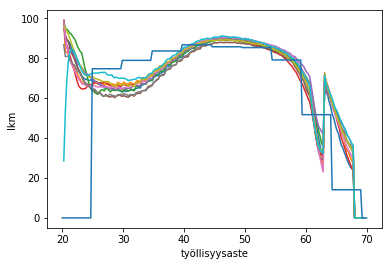

best_emp 4
Vaikutus työllisyyteen keskiarvo 1825192.8 htv, mediaani 1826983.5 htv
                        keskiarvo 1826390.0 työllistä, mediaani 1828436.0 työllistä


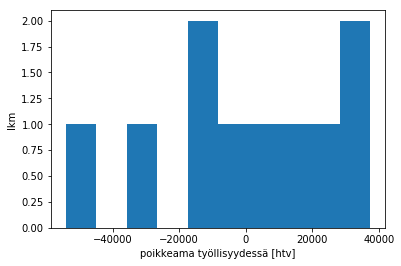

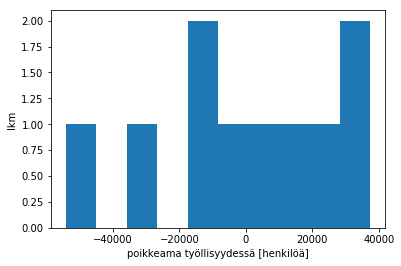

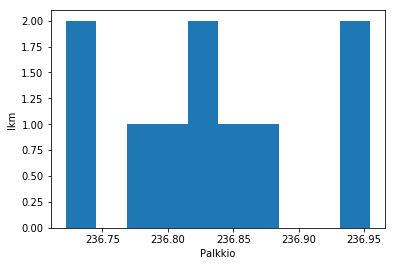

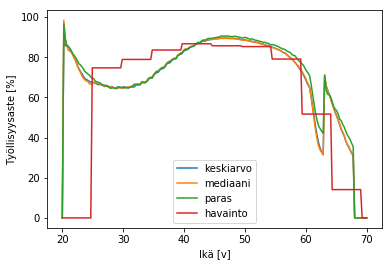

plot


In [3]:
cc1=Lifecycle(env='unemployment-v1',minimal=False,mortality=mortality,perustulo=False,
              randomness=randomness,pinkslip=pinkslip,plotdebug=False)
cc1.explain()
cc1.run_distrib(n=10,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/distrib_base',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage,
                learning_rate=0.05)

In [4]:

#cc1.render_distrib(load='results/perus_results2')


# Työttömyysputken poisto

Työttömyysputkelle meneminen on usein hyvin suosittua elinkaarimalleissa. Tarkastellaan millainen työllisyysvaikutus on putken poistamisella.

No mortality included
train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.939    |
| fps                | 1262     |
| nupdates           | 1        |
| policy_entropy     | 0.825    |
| policy_loss        | -0.163   |
| total_timesteps    | 0        |
| value_loss         | 0.642    |
---------------------------------
---------------------------------
| explained_variance | 0.92     |
| fps                | 2118     |
| nupdates           | 10       |
| policy_entropy     | 0.837    |
| policy_loss        | 1.16     |
| total_timesteps    | 22041    |
| value_loss         | 2.42     |
---------------------------------
---------------------------------
| explained_variance | 0.847    |
| fps                | 1959     |
| nupdates           | 20       |
| policy_entropy     | 0.765    |
| policy_loss        | -2       |
| total_timesteps    | 46531    |
| value_loss         | 8.6      |
------------------------

---------------------------------
| explained_variance | 0.956    |
| fps                | 1791     |
| nupdates           | 270      |
| policy_entropy     | 0.787    |
| policy_loss        | 0.0955   |
| total_timesteps    | 658781   |
| value_loss         | 0.578    |
---------------------------------
---------------------------------
| explained_variance | 0.949    |
| fps                | 1790     |
| nupdates           | 280      |
| policy_entropy     | 0.79     |
| policy_loss        | -0.302   |
| total_timesteps    | 683271   |
| value_loss         | 0.601    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 1789     |
| nupdates           | 290      |
| policy_entropy     | 0.765    |
| policy_loss        | 0.145    |
| total_timesteps    | 707761   |
| value_loss         | 0.638    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

---------------------------------
| explained_variance | 0.96     |
| fps                | 1773     |
| nupdates           | 540      |
| policy_entropy     | 0.877    |
| policy_loss        | -0.0316  |
| total_timesteps    | 1320011  |
| value_loss         | 0.435    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 1774     |
| nupdates           | 550      |
| policy_entropy     | 0.849    |
| policy_loss        | -0.0298  |
| total_timesteps    | 1344501  |
| value_loss         | 0.434    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps                | 1774     |
| nupdates           | 560      |
| policy_entropy     | 0.791    |
| policy_loss        | -0.0501  |
| total_timesteps    | 1368991  |
| value_loss         | 0.698    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 1778     |
| nupdates           | 810      |
| policy_entropy     | 0.866    |
| policy_loss        | -0.0498  |
| total_timesteps    | 1981241  |
| value_loss         | 0.326    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps                | 1779     |
| nupdates           | 820      |
| policy_entropy     | 0.731    |
| policy_loss        | 0.00483  |
| total_timesteps    | 2005731  |
| value_loss         | 0.435    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps                | 1779     |
| nupdates           | 830      |
| policy_entropy     | 0.763    |
| policy_loss        | -0.0169  |
| total_timesteps    | 2030221  |
| value_loss         | 0.222    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 1784     |
| nupdates           | 1080     |
| policy_entropy     | 0.809    |
| policy_loss        | -0.0749  |
| total_timesteps    | 2642471  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps                | 1785     |
| nupdates           | 1090     |
| policy_entropy     | 0.766    |
| policy_loss        | 0.0712   |
| total_timesteps    | 2666961  |
| value_loss         | 0.325    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1784     |
| nupdates           | 1100     |
| policy_entropy     | 0.753    |
| policy_loss        | 0.0437   |
| total_timesteps    | 2691451  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.946    |
| fps                | 1790     |
| nupdates           | 1350     |
| policy_entropy     | 0.818    |
| policy_loss        | 0.0325   |
| total_timesteps    | 3303701  |
| value_loss         | 0.631    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 1790     |
| nupdates           | 1360     |
| policy_entropy     | 0.814    |
| policy_loss        | 0.0284   |
| total_timesteps    | 3328191  |
| value_loss         | 0.404    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 1790     |
| nupdates           | 1370     |
| policy_entropy     | 0.789    |
| policy_loss        | 0.0157   |
| total_timesteps    | 3352681  |
| value_loss         | 0.303    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

---------------------------------
| explained_variance | 0.974    |
| fps                | 1795     |
| nupdates           | 1620     |
| policy_entropy     | 0.762    |
| policy_loss        | 0.0164   |
| total_timesteps    | 3964931  |
| value_loss         | 0.285    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 1795     |
| nupdates           | 1630     |
| policy_entropy     | 0.828    |
| policy_loss        | -0.0526  |
| total_timesteps    | 3989421  |
| value_loss         | 0.261    |
---------------------------------
---------------------------------
| explained_variance | 0.987    |
| fps                | 1795     |
| nupdates           | 1640     |
| policy_entropy     | 0.732    |
| policy_loss        | 0.0493   |
| total_timesteps    | 4013911  |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.967    |
| fps         

---------------------------------
| explained_variance | 0.964    |
| fps                | 1799     |
| nupdates           | 1890     |
| policy_entropy     | 0.748    |
| policy_loss        | 0.0248   |
| total_timesteps    | 4626161  |
| value_loss         | 0.555    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 1799     |
| nupdates           | 1900     |
| policy_entropy     | 0.765    |
| policy_loss        | -0.0743  |
| total_timesteps    | 4650651  |
| value_loss         | 0.566    |
---------------------------------
---------------------------------
| explained_variance | 0.953    |
| fps                | 1800     |
| nupdates           | 1910     |
| policy_entropy     | 0.811    |
| policy_loss        | -0.0126  |
| total_timesteps    | 4675141  |
| value_loss         | 0.377    |
---------------------------------
---------------------------------
| explained_variance | 0.964    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.968    |
| fps                | 1323     |
| nupdates           | 1        |
| policy_entropy     | 0.761    |
| policy_loss        | -0.028   |
| total_timesteps    | 0        |
| value_loss         | 0.44     |
---------------------------------
---------------------------------
| explained_variance | 0.871    |
| fps                | 2338     |
| nupdates           | 10       |
| policy_entropy     | 0.0548   |
| policy_loss        | 0.0241   |
| total_timesteps    | 22041    |
| value_loss         | 2.41     |
---------------------------------
---------------------------------
| explained_variance | 0.96     |
| fps                | 2070     |
| nupdates           | 20       |
| policy_entropy     | 0.0579   |
| policy_loss        | 0.0188   |
| total_timesteps    | 46531    |
| value_loss         | 0.603    |
---------------------------------
------------

---------------------------------
| explained_variance | 0.964    |
| fps                | 1856     |
| nupdates           | 270      |
| policy_entropy     | 0.0516   |
| policy_loss        | -0.0154  |
| total_timesteps    | 658781   |
| value_loss         | 0.67     |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps                | 1854     |
| nupdates           | 280      |
| policy_entropy     | 0.0327   |
| policy_loss        | -0.00203 |
| total_timesteps    | 683271   |
| value_loss         | 0.216    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 1854     |
| nupdates           | 290      |
| policy_entropy     | 0.0478   |
| policy_loss        | 0.00597  |
| total_timesteps    | 707761   |
| value_loss         | 0.296    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.979    |
| fps                | 1844     |
| nupdates           | 540      |
| policy_entropy     | 0.21     |
| policy_loss        | 0.031    |
| total_timesteps    | 1320011  |
| value_loss         | 0.329    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 1844     |
| nupdates           | 550      |
| policy_entropy     | 0.164    |
| policy_loss        | -0.00296 |
| total_timesteps    | 1344501  |
| value_loss         | 0.207    |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 1844     |
| nupdates           | 560      |
| policy_entropy     | 0.211    |
| policy_loss        | 0.0253   |
| total_timesteps    | 1368991  |
| value_loss         | 0.366    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps         

---------------------------------
| explained_variance | 0.986    |
| fps                | 1840     |
| nupdates           | 810      |
| policy_entropy     | 0.285    |
| policy_loss        | 0.0302   |
| total_timesteps    | 1981241  |
| value_loss         | 0.217    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps                | 1840     |
| nupdates           | 820      |
| policy_entropy     | 0.275    |
| policy_loss        | 0.00305  |
| total_timesteps    | 2005731  |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1840     |
| nupdates           | 830      |
| policy_entropy     | 0.293    |
| policy_loss        | 0.00918  |
| total_timesteps    | 2030221  |
| value_loss         | 0.297    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps         

---------------------------------
| explained_variance | 0.969    |
| fps                | 1801     |
| nupdates           | 1080     |
| policy_entropy     | 0.298    |
| policy_loss        | -0.0316  |
| total_timesteps    | 2642471  |
| value_loss         | 0.334    |
---------------------------------
---------------------------------
| explained_variance | 0.988    |
| fps                | 1799     |
| nupdates           | 1090     |
| policy_entropy     | 0.442    |
| policy_loss        | 0.0439   |
| total_timesteps    | 2666961  |
| value_loss         | 0.178    |
---------------------------------
---------------------------------
| explained_variance | 0.976    |
| fps                | 1797     |
| nupdates           | 1100     |
| policy_entropy     | 0.5      |
| policy_loss        | -0.105   |
| total_timesteps    | 2691451  |
| value_loss         | 0.294    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 1752     |
| nupdates           | 1350     |
| policy_entropy     | 0.657    |
| policy_loss        | -0.0478  |
| total_timesteps    | 3303701  |
| value_loss         | 0.397    |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 1751     |
| nupdates           | 1360     |
| policy_entropy     | 0.417    |
| policy_loss        | 0.0562   |
| total_timesteps    | 3328191  |
| value_loss         | 0.394    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1749     |
| nupdates           | 1370     |
| policy_entropy     | 0.483    |
| policy_loss        | -0.0314  |
| total_timesteps    | 3352681  |
| value_loss         | 0.449    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.968    |
| fps                | 1790     |
| nupdates           | 1620     |
| policy_entropy     | 0.642    |
| policy_loss        | -0.0354  |
| total_timesteps    | 3964931  |
| value_loss         | 0.426    |
---------------------------------
---------------------------------
| explained_variance | 0.881    |
| fps                | 1791     |
| nupdates           | 1630     |
| policy_entropy     | 0.701    |
| policy_loss        | -0.147   |
| total_timesteps    | 3989421  |
| value_loss         | 0.834    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 1793     |
| nupdates           | 1640     |
| policy_entropy     | 0.642    |
| policy_loss        | -0.00169 |
| total_timesteps    | 4013911  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.971    |
| fps                | 1828     |
| nupdates           | 1890     |
| policy_entropy     | 0.633    |
| policy_loss        | -0.00133 |
| total_timesteps    | 4626161  |
| value_loss         | 0.385    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 1830     |
| nupdates           | 1900     |
| policy_entropy     | 0.664    |
| policy_loss        | 0.0494   |
| total_timesteps    | 4650651  |
| value_loss         | 0.254    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 1831     |
| nupdates           | 1910     |
| policy_entropy     | 0.673    |
| policy_loss        | -0.0645  |
| total_timesteps    | 4675141  |
| value_loss         | 0.34     |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.955    |
| fps                | 1494     |
| nupdates           | 1        |
| policy_entropy     | 0.79     |
| policy_loss        | -0.102   |
| total_timesteps    | 0        |
| value_loss         | 0.416    |
---------------------------------
---------------------------------
| explained_variance | 0.898    |
| fps                | 2564     |
| nupdates           | 10       |
| policy_entropy     | 0.541    |
| policy_loss        | 0.957    |
| total_timesteps    | 22041    |
| value_loss         | 4.24     |
---------------------------------
---------------------------------
| explained_variance | 0.902    |
| fps                | 2307     |
| nupdates           | 20       |
| policy_entropy     | 0.456    |
| policy_loss        | -0.741   |
| total_timesteps    | 46531    |
| value_loss         | 5.09     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.955    |
| fps                | 2095     |
| nupdates           | 270      |
| policy_entropy     | 0.878    |
| policy_loss        | -0.0129  |
| total_timesteps    | 658781   |
| value_loss         | 0.487    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2094     |
| nupdates           | 280      |
| policy_entropy     | 0.76     |
| policy_loss        | 0.023    |
| total_timesteps    | 683271   |
| value_loss         | 0.36     |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps                | 2094     |
| nupdates           | 290      |
| policy_entropy     | 0.791    |
| policy_loss        | -0.0704  |
| total_timesteps    | 707761   |
| value_loss         | 0.576    |
---------------------------------
---------------------------------
| explained_variance | 0.928    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2085     |
| nupdates           | 540      |
| policy_entropy     | 0.837    |
| policy_loss        | 0.0967   |
| total_timesteps    | 1320011  |
| value_loss         | 0.235    |
---------------------------------
---------------------------------
| explained_variance | 0.981    |
| fps                | 2085     |
| nupdates           | 550      |
| policy_entropy     | 0.762    |
| policy_loss        | -0.0553  |
| total_timesteps    | 1344501  |
| value_loss         | 0.316    |
---------------------------------
---------------------------------
| explained_variance | 0.989    |
| fps                | 2085     |
| nupdates           | 560      |
| policy_entropy     | 0.72     |
| policy_loss        | 0.116    |
| total_timesteps    | 1368991  |
| value_loss         | 0.197    |
---------------------------------
---------------------------------
| explained_variance | 0.985    |
| fps         

---------------------------------
| explained_variance | 0.945    |
| fps                | 2083     |
| nupdates           | 810      |
| policy_entropy     | 0.78     |
| policy_loss        | -0.104   |
| total_timesteps    | 1981241  |
| value_loss         | 0.64     |
---------------------------------
---------------------------------
| explained_variance | 0.946    |
| fps                | 2083     |
| nupdates           | 820      |
| policy_entropy     | 0.756    |
| policy_loss        | 0.149    |
| total_timesteps    | 2005731  |
| value_loss         | 0.516    |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2083     |
| nupdates           | 830      |
| policy_entropy     | 0.804    |
| policy_loss        | -0.0614  |
| total_timesteps    | 2030221  |
| value_loss         | 0.482    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.935    |
| fps                | 2083     |
| nupdates           | 1080     |
| policy_entropy     | 0.814    |
| policy_loss        | -0.0145  |
| total_timesteps    | 2642471  |
| value_loss         | 0.374    |
---------------------------------
---------------------------------
| explained_variance | 0.963    |
| fps                | 2083     |
| nupdates           | 1090     |
| policy_entropy     | 0.773    |
| policy_loss        | -0.136   |
| total_timesteps    | 2666961  |
| value_loss         | 0.44     |
---------------------------------
---------------------------------
| explained_variance | 0.975    |
| fps                | 2083     |
| nupdates           | 1100     |
| policy_entropy     | 0.707    |
| policy_loss        | 0.168    |
| total_timesteps    | 2691451  |
| value_loss         | 0.416    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.958    |
| fps                | 2085     |
| nupdates           | 1350     |
| policy_entropy     | 0.708    |
| policy_loss        | -0.118   |
| total_timesteps    | 3303701  |
| value_loss         | 0.467    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2085     |
| nupdates           | 1360     |
| policy_entropy     | 0.756    |
| policy_loss        | 0.077    |
| total_timesteps    | 3328191  |
| value_loss         | 0.46     |
---------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2085     |
| nupdates           | 1370     |
| policy_entropy     | 0.821    |
| policy_loss        | -0.0231  |
| total_timesteps    | 3352681  |
| value_loss         | 0.342    |
---------------------------------
---------------------------------
| explained_variance | 0.954    |
| fps         

---------------------------------
| explained_variance | 0.972    |
| fps                | 2087     |
| nupdates           | 1620     |
| policy_entropy     | 0.759    |
| policy_loss        | 0.0631   |
| total_timesteps    | 3964931  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps                | 2087     |
| nupdates           | 1630     |
| policy_entropy     | 0.837    |
| policy_loss        | 0.0362   |
| total_timesteps    | 3989421  |
| value_loss         | 0.337    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2087     |
| nupdates           | 1640     |
| policy_entropy     | 0.814    |
| policy_loss        | -0.0512  |
| total_timesteps    | 4013911  |
| value_loss         | 0.385    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.987    |
| fps                | 2088     |
| nupdates           | 1890     |
| policy_entropy     | 0.741    |
| policy_loss        | 0.159    |
| total_timesteps    | 4626161  |
| value_loss         | 0.218    |
---------------------------------
---------------------------------
| explained_variance | 0.968    |
| fps                | 2088     |
| nupdates           | 1900     |
| policy_entropy     | 0.823    |
| policy_loss        | 0.0427   |
| total_timesteps    | 4650651  |
| value_loss         | 0.314    |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2088     |
| nupdates           | 1910     |
| policy_entropy     | 0.877    |
| policy_loss        | -0.101   |
| total_timesteps    | 4675141  |
| value_loss         | 0.381    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps         

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.973    |
| fps                | 1471     |
| nupdates           | 1        |
| policy_entropy     | 0.748    |
| policy_loss        | 0.0217   |
| total_timesteps    | 0        |
| value_loss         | 0.42     |
---------------------------------
---------------------------------
| explained_variance | 0.411    |
| fps                | 2552     |
| nupdates           | 10       |
| policy_entropy     | 0.53     |
| policy_loss        | 0.553    |
| total_timesteps    | 22041    |
| value_loss         | 9.01     |
---------------------------------
---------------------------------
| explained_variance | 0.689    |
| fps                | 2298     |
| nupdates           | 20       |
| policy_entropy     | 0.468    |
| policy_loss        | 0.352    |
| total_timesteps    | 46531    |
| value_loss         | 3.63     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.931    |
| fps                | 2093     |
| nupdates           | 270      |
| policy_entropy     | 0.832    |
| policy_loss        | -0.826   |
| total_timesteps    | 658781   |
| value_loss         | 1.76     |
---------------------------------
---------------------------------
| explained_variance | 0.942    |
| fps                | 2092     |
| nupdates           | 280      |
| policy_entropy     | 0.767    |
| policy_loss        | 0.151    |
| total_timesteps    | 683271   |
| value_loss         | 0.696    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2092     |
| nupdates           | 290      |
| policy_entropy     | 0.689    |
| policy_loss        | 0.309    |
| total_timesteps    | 707761   |
| value_loss         | 0.891    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.957    |
| fps                | 2086     |
| nupdates           | 540      |
| policy_entropy     | 0.765    |
| policy_loss        | 0.0233   |
| total_timesteps    | 1320011  |
| value_loss         | 0.28     |
---------------------------------
---------------------------------
| explained_variance | 0.974    |
| fps                | 2086     |
| nupdates           | 550      |
| policy_entropy     | 0.736    |
| policy_loss        | 0.0363   |
| total_timesteps    | 1344501  |
| value_loss         | 0.425    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2086     |
| nupdates           | 560      |
| policy_entropy     | 0.741    |
| policy_loss        | 0.0285   |
| total_timesteps    | 1368991  |
| value_loss         | 0.384    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.955    |
| fps                | 2084     |
| nupdates           | 810      |
| policy_entropy     | 0.82     |
| policy_loss        | -0.173   |
| total_timesteps    | 1981241  |
| value_loss         | 0.452    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2084     |
| nupdates           | 820      |
| policy_entropy     | 0.811    |
| policy_loss        | 0.116    |
| total_timesteps    | 2005731  |
| value_loss         | 0.391    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2084     |
| nupdates           | 830      |
| policy_entropy     | 0.767    |
| policy_loss        | -0.0222  |
| total_timesteps    | 2030221  |
| value_loss         | 0.311    |
---------------------------------
---------------------------------
| explained_variance | 0.978    |
| fps         

---------------------------------
| explained_variance | 0.951    |
| fps                | 2085     |
| nupdates           | 1080     |
| policy_entropy     | 0.783    |
| policy_loss        | -0.101   |
| total_timesteps    | 2642471  |
| value_loss         | 0.632    |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2085     |
| nupdates           | 1090     |
| policy_entropy     | 0.678    |
| policy_loss        | 0.118    |
| total_timesteps    | 2666961  |
| value_loss         | 0.389    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2085     |
| nupdates           | 1100     |
| policy_entropy     | 0.796    |
| policy_loss        | 0.0326   |
| total_timesteps    | 2691451  |
| value_loss         | 0.398    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.975    |
| fps                | 2085     |
| nupdates           | 1350     |
| policy_entropy     | 0.789    |
| policy_loss        | -0.0346  |
| total_timesteps    | 3303701  |
| value_loss         | 0.419    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps                | 2085     |
| nupdates           | 1360     |
| policy_entropy     | 0.811    |
| policy_loss        | -0.129   |
| total_timesteps    | 3328191  |
| value_loss         | 0.721    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps                | 2085     |
| nupdates           | 1370     |
| policy_entropy     | 0.798    |
| policy_loss        | 0.00584  |
| total_timesteps    | 3352681  |
| value_loss         | 0.456    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps         

---------------------------------
| explained_variance | 0.929    |
| fps                | 2086     |
| nupdates           | 1620     |
| policy_entropy     | 0.768    |
| policy_loss        | -0.112   |
| total_timesteps    | 3964931  |
| value_loss         | 0.581    |
---------------------------------
---------------------------------
| explained_variance | 0.984    |
| fps                | 2086     |
| nupdates           | 1630     |
| policy_entropy     | 0.673    |
| policy_loss        | 0.15     |
| total_timesteps    | 3989421  |
| value_loss         | 0.265    |
---------------------------------
---------------------------------
| explained_variance | 0.983    |
| fps                | 2086     |
| nupdates           | 1640     |
| policy_entropy     | 0.744    |
| policy_loss        | 0.121    |
| total_timesteps    | 4013911  |
| value_loss         | 0.275    |
---------------------------------
---------------------------------
| explained_variance | 0.986    |
| fps         

----------------------------------
| explained_variance | 0.971     |
| fps                | 2087      |
| nupdates           | 1890      |
| policy_entropy     | 0.768     |
| policy_loss        | -8.02e-05 |
| total_timesteps    | 4626161   |
| value_loss         | 0.373     |
----------------------------------
---------------------------------
| explained_variance | 0.979    |
| fps                | 2087     |
| nupdates           | 1900     |
| policy_entropy     | 0.789    |
| policy_loss        | -0.057   |
| total_timesteps    | 4650651  |
| value_loss         | 0.403    |
---------------------------------
---------------------------------
| explained_variance | 0.951    |
| fps                | 2087     |
| nupdates           | 1910     |
| policy_entropy     | 0.847    |
| policy_loss        | -0.0955  |
| total_timesteps    | 4675141  |
| value_loss         | 0.675    |
---------------------------------
---------------------------------
| explained_variance | 0.947    |
| fps

train...
phase 1
batch 1 learning rate 0.125 scaled 0.125
training...
---------------------------------
| explained_variance | 0.97     |
| fps                | 1536     |
| nupdates           | 1        |
| policy_entropy     | 0.758    |
| policy_loss        | -0.0458  |
| total_timesteps    | 0        |
| value_loss         | 0.357    |
---------------------------------
---------------------------------
| explained_variance | 0.517    |
| fps                | 2573     |
| nupdates           | 10       |
| policy_entropy     | 0.197    |
| policy_loss        | -1.09    |
| total_timesteps    | 22041    |
| value_loss         | 43.6     |
---------------------------------
---------------------------------
| explained_variance | 0.626    |
| fps                | 2314     |
| nupdates           | 20       |
| policy_entropy     | 0.203    |
| policy_loss        | -0.9     |
| total_timesteps    | 46531    |
| value_loss         | 35.7     |
---------------------------------
------------

---------------------------------
| explained_variance | 0.97     |
| fps                | 2092     |
| nupdates           | 270      |
| policy_entropy     | 0.406    |
| policy_loss        | 0.0774   |
| total_timesteps    | 658781   |
| value_loss         | 0.49     |
---------------------------------
---------------------------------
| explained_variance | 0.969    |
| fps                | 2092     |
| nupdates           | 280      |
| policy_entropy     | 0.385    |
| policy_loss        | -0.144   |
| total_timesteps    | 683271   |
| value_loss         | 0.563    |
---------------------------------
---------------------------------
| explained_variance | 0.932    |
| fps                | 2092     |
| nupdates           | 290      |
| policy_entropy     | 0.446    |
| policy_loss        | 0.118    |
| total_timesteps    | 707761   |
| value_loss         | 0.565    |
---------------------------------
---------------------------------
| explained_variance | 0.955    |
| fps         

---------------------------------
| explained_variance | 0.965    |
| fps                | 2085     |
| nupdates           | 540      |
| policy_entropy     | 0.758    |
| policy_loss        | 0.0401   |
| total_timesteps    | 1320011  |
| value_loss         | 0.25     |
---------------------------------
---------------------------------
| explained_variance | 0.971    |
| fps                | 2086     |
| nupdates           | 550      |
| policy_entropy     | 0.806    |
| policy_loss        | 0.0877   |
| total_timesteps    | 1344501  |
| value_loss         | 0.388    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2086     |
| nupdates           | 560      |
| policy_entropy     | 0.713    |
| policy_loss        | -0.0755  |
| total_timesteps    | 1368991  |
| value_loss         | 0.469    |
---------------------------------
---------------------------------
| explained_variance | 0.945    |
| fps         

---------------------------------
| explained_variance | 0.951    |
| fps                | 2087     |
| nupdates           | 810      |
| policy_entropy     | 0.724    |
| policy_loss        | 0.186    |
| total_timesteps    | 1981241  |
| value_loss         | 0.496    |
---------------------------------
---------------------------------
| explained_variance | 0.936    |
| fps                | 2087     |
| nupdates           | 820      |
| policy_entropy     | 0.739    |
| policy_loss        | -0.0022  |
| total_timesteps    | 2005731  |
| value_loss         | 0.567    |
---------------------------------
---------------------------------
| explained_variance | 0.982    |
| fps                | 2087     |
| nupdates           | 830      |
| policy_entropy     | 0.814    |
| policy_loss        | -0.0503  |
| total_timesteps    | 2030221  |
| value_loss         | 0.269    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps         

---------------------------------
| explained_variance | 0.914    |
| fps                | 2085     |
| nupdates           | 1080     |
| policy_entropy     | 0.804    |
| policy_loss        | -0.0174  |
| total_timesteps    | 2642471  |
| value_loss         | 0.561    |
---------------------------------
---------------------------------
| explained_variance | 0.956    |
| fps                | 2085     |
| nupdates           | 1090     |
| policy_entropy     | 0.81     |
| policy_loss        | -0.0471  |
| total_timesteps    | 2666961  |
| value_loss         | 0.443    |
---------------------------------
---------------------------------
| explained_variance | 0.959    |
| fps                | 2086     |
| nupdates           | 1100     |
| policy_entropy     | 0.749    |
| policy_loss        | 0.064    |
| total_timesteps    | 2691451  |
| value_loss         | 0.455    |
---------------------------------
---------------------------------
| explained_variance | 0.965    |
| fps         

---------------------------------
| explained_variance | 0.932    |
| fps                | 2087     |
| nupdates           | 1350     |
| policy_entropy     | 0.778    |
| policy_loss        | -0.00491 |
| total_timesteps    | 3303701  |
| value_loss         | 0.879    |
---------------------------------
---------------------------------
| explained_variance | 0.972    |
| fps                | 2087     |
| nupdates           | 1360     |
| policy_entropy     | 0.731    |
| policy_loss        | 0.0405   |
| total_timesteps    | 3328191  |
| value_loss         | 0.401    |
---------------------------------
---------------------------------
| explained_variance | 0.933    |
| fps                | 2087     |
| nupdates           | 1370     |
| policy_entropy     | 0.804    |
| policy_loss        | -0.0523  |
| total_timesteps    | 3352681  |
| value_loss         | 0.472    |
---------------------------------
---------------------------------
| explained_variance | 0.977    |
| fps         

---------------------------------
| explained_variance | 0.907    |
| fps                | 2089     |
| nupdates           | 1620     |
| policy_entropy     | 0.837    |
| policy_loss        | -0.174   |
| total_timesteps    | 3964931  |
| value_loss         | 0.794    |
---------------------------------
---------------------------------
| explained_variance | 0.897    |
| fps                | 2089     |
| nupdates           | 1630     |
| policy_entropy     | 0.811    |
| policy_loss        | -0.0437  |
| total_timesteps    | 3989421  |
| value_loss         | 0.921    |
---------------------------------
---------------------------------
| explained_variance | 0.97     |
| fps                | 2089     |
| nupdates           | 1640     |
| policy_entropy     | 0.76     |
| policy_loss        | 0.101    |
| total_timesteps    | 4013911  |
| value_loss         | 0.404    |
---------------------------------
---------------------------------
| explained_variance | 0.962    |
| fps         

---------------------------------
| explained_variance | 0.97     |
| fps                | 2091     |
| nupdates           | 1890     |
| policy_entropy     | 0.815    |
| policy_loss        | -0.0243  |
| total_timesteps    | 4626161  |
| value_loss         | 0.32     |
---------------------------------
---------------------------------
| explained_variance | 0.961    |
| fps                | 2091     |
| nupdates           | 1900     |
| policy_entropy     | 0.774    |
| policy_loss        | 0.0174   |
| total_timesteps    | 4650651  |
| value_loss         | 0.474    |
---------------------------------
---------------------------------
| explained_variance | 0.98     |
| fps                | 2091     |
| nupdates           | 1910     |
| policy_entropy     | 0.805    |
| policy_loss        | -0.0338  |
| total_timesteps    | 4675141  |
| value_loss         | 0.298    |
---------------------------------
---------------------------------
| explained_variance | 0.966    |
| fps         

2.469723954299387
20 70 (204,)


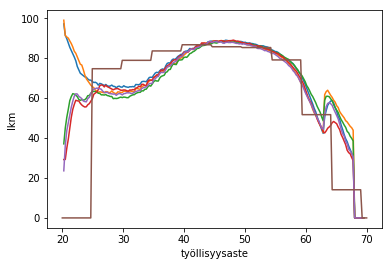

best_emp 4
Vaikutus työllisyyteen keskiarvo 1795282.2 htv, mediaani 1789936.0 htv
                        keskiarvo 1796721.0 työllistä, mediaani 1790564.0 työllistä


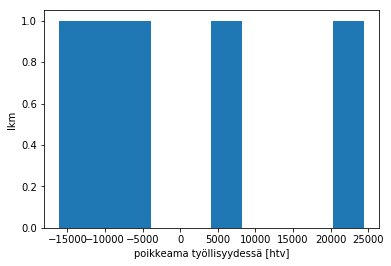

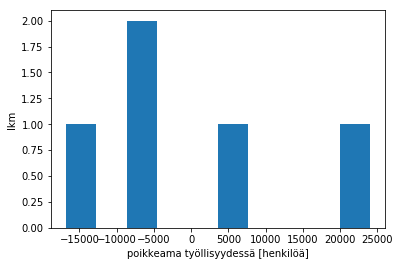

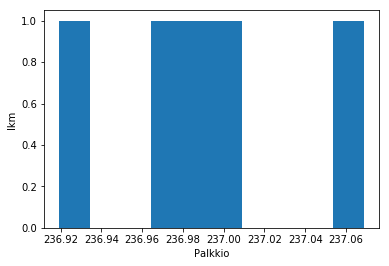

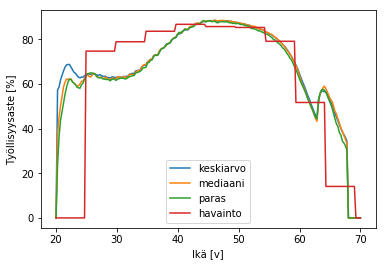

plot


In [5]:
cc1_putki=Lifecycle(env='unemployment-v1',minimal=False,include_putki=False,mortality=mortality,
                    perustulo=False,randomness=randomness)
cc1_putki.run_distrib(n=5,debug=False,steps1=size1,steps2=size2,pop=pop_size,deterministic=deterministic,
                train=True,predict=True,batch1=batch1,batch2=batch2,
                save=perusmalli,plot=True,cont=True,start_from=perusmalli,results='results/distrib_poisto',
                callback_minsteps=callback_minsteps,rlmodel=rlmodel,twostage=twostage)


In [6]:
cc1_putki.render_distrib(load='results/putki_results')
cc1_putki.compare_simstats('results/putki_results','results/putki_results')                    

AttributeError: 'Lifecycle' object has no attribute 'render_distrib'